In [13]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import torch
import copy
from models import *
from utils import *


In [14]:
# File paths
test_challenge_file_path = 'arc-prize-2024/arc-agi_test_challenges.json'
training_challenge_file_path = 'arc-prize-2024/arc-agi_training_challenges.json'
training_solutions_file_path = 'arc-prize-2024/arc-agi_training_solutions.json'
evaluation_challenge_file_path = 'arc-prize-2024/arc-agi_evaluation_challenges.json'
evaluation_solutions_file_path = 'arc-prize-2024/arc-agi_evaluation_solutions.json'

# Load JSON files
with open(test_challenge_file_path, 'r') as file:
    test_challenges_data = json.load(file)

with open(training_challenge_file_path, 'r') as file:
    training_challenges_data = json.load(file)

with open(training_solutions_file_path, 'r') as file:
    training_solutions_data = json.load(file)

with open(evaluation_challenge_file_path, 'r') as file:
    evaluation_challenges_data = json.load(file)

with open(evaluation_solutions_file_path, 'r') as file:
    evaluation_solutions_data = json.load(file)

# Convert JSON data to DataFrames
test_challenges_df = json_to_dataframe(test_challenges_data)
training_challenges_df = json_to_dataframe(training_challenges_data, training_solutions_data)
evaluation_challenges_df = json_to_dataframe(evaluation_challenges_data, evaluation_solutions_data)

# Display the DataFrames
print("Test Challenges DataFrame:")
display(test_challenges_df.head())
print("\nTraining Challenges DataFrame:")
display(training_challenges_df.head())
print("\nEvaluation Challenges DataFrame:")
display(evaluation_challenges_df.head())

# Save DataFrames to CSV files
test_challenges_df.to_csv('test_challenges_data.csv', index=False)
training_challenges_df.to_csv('training_challenges_data.csv', index=False)
evaluation_challenges_df.to_csv('evaluation_challenges_data.csv', index=False)

Test Challenges DataFrame:


,id,train,test
0,007bbfb7,"[{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], ...","[{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}]"
1,00d62c1b,"[{'input': [[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,017c7c7b,"[{'input': [[0, 1, 0], [1, 1, 0], [0, 1, 0], [...","[{'input': [[1, 1, 1], [0, 1, 0], [0, 1, 0], [..."
3,025d127b,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0..."
4,045e512c,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."



Training Challenges DataFrame:


,id,train,test
0,007bbfb7,"[{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], ...","[{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]], ..."
1,00d62c1b,"[{'input': [[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,017c7c7b,"[{'input': [[0, 1, 0], [1, 1, 0], [0, 1, 0], [...","[{'input': [[1, 1, 1], [0, 1, 0], [0, 1, 0], [..."
3,025d127b,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0..."
4,045e512c,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."



Evaluation Challenges DataFrame:


,id,train,test
0,00576224,"[{'input': [[8, 6], [6, 4]], 'output': [[8, 6,...","[{'input': [[3, 2], [7, 8]], 'output': [[3, 2,..."
1,009d5c81,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,00dbd492,"[{'input': [[2, 2, 2, 2, 2, 0, 0], [2, 0, 0, 0...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,03560426,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0..."
4,05a7bcf2,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ..."


In [16]:
a, b, c, d = filter_data_by_id('007bbfb7', training_challenges_df)
e, f, g, h = filter_data_by_id('00576224', evaluation_challenges_df)
i, j, k = filter_data_by_id('007bbfb7', test_challenges_df, solution=False)
a

[[7, 0, 7], [7, 0, 7], [7, 7, 0]]

In [17]:
train_ids = training_challenges_df['id'].values
eval_ids = evaluation_challenges_df['id'].values
test_ids = test_challenges_df['id'].values

print(len(training_challenges_df['id'].values))
print(len(evaluation_challenges_df['id'].values))
print(len(test_challenges_df['id'].values))

400
400
100


3 24 24 3 5 5


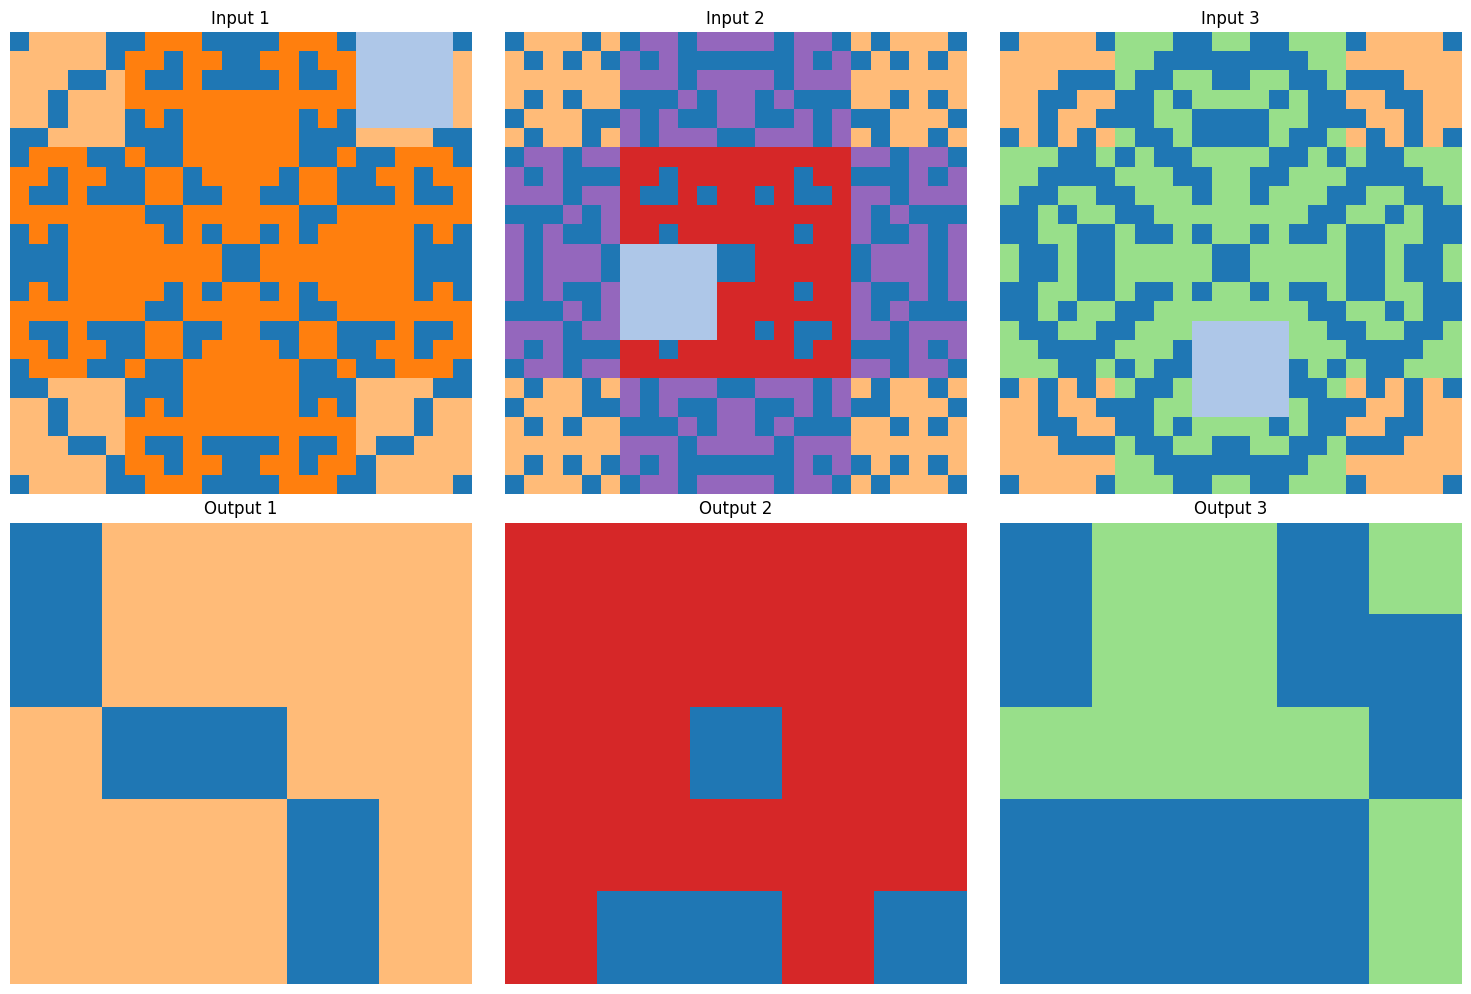

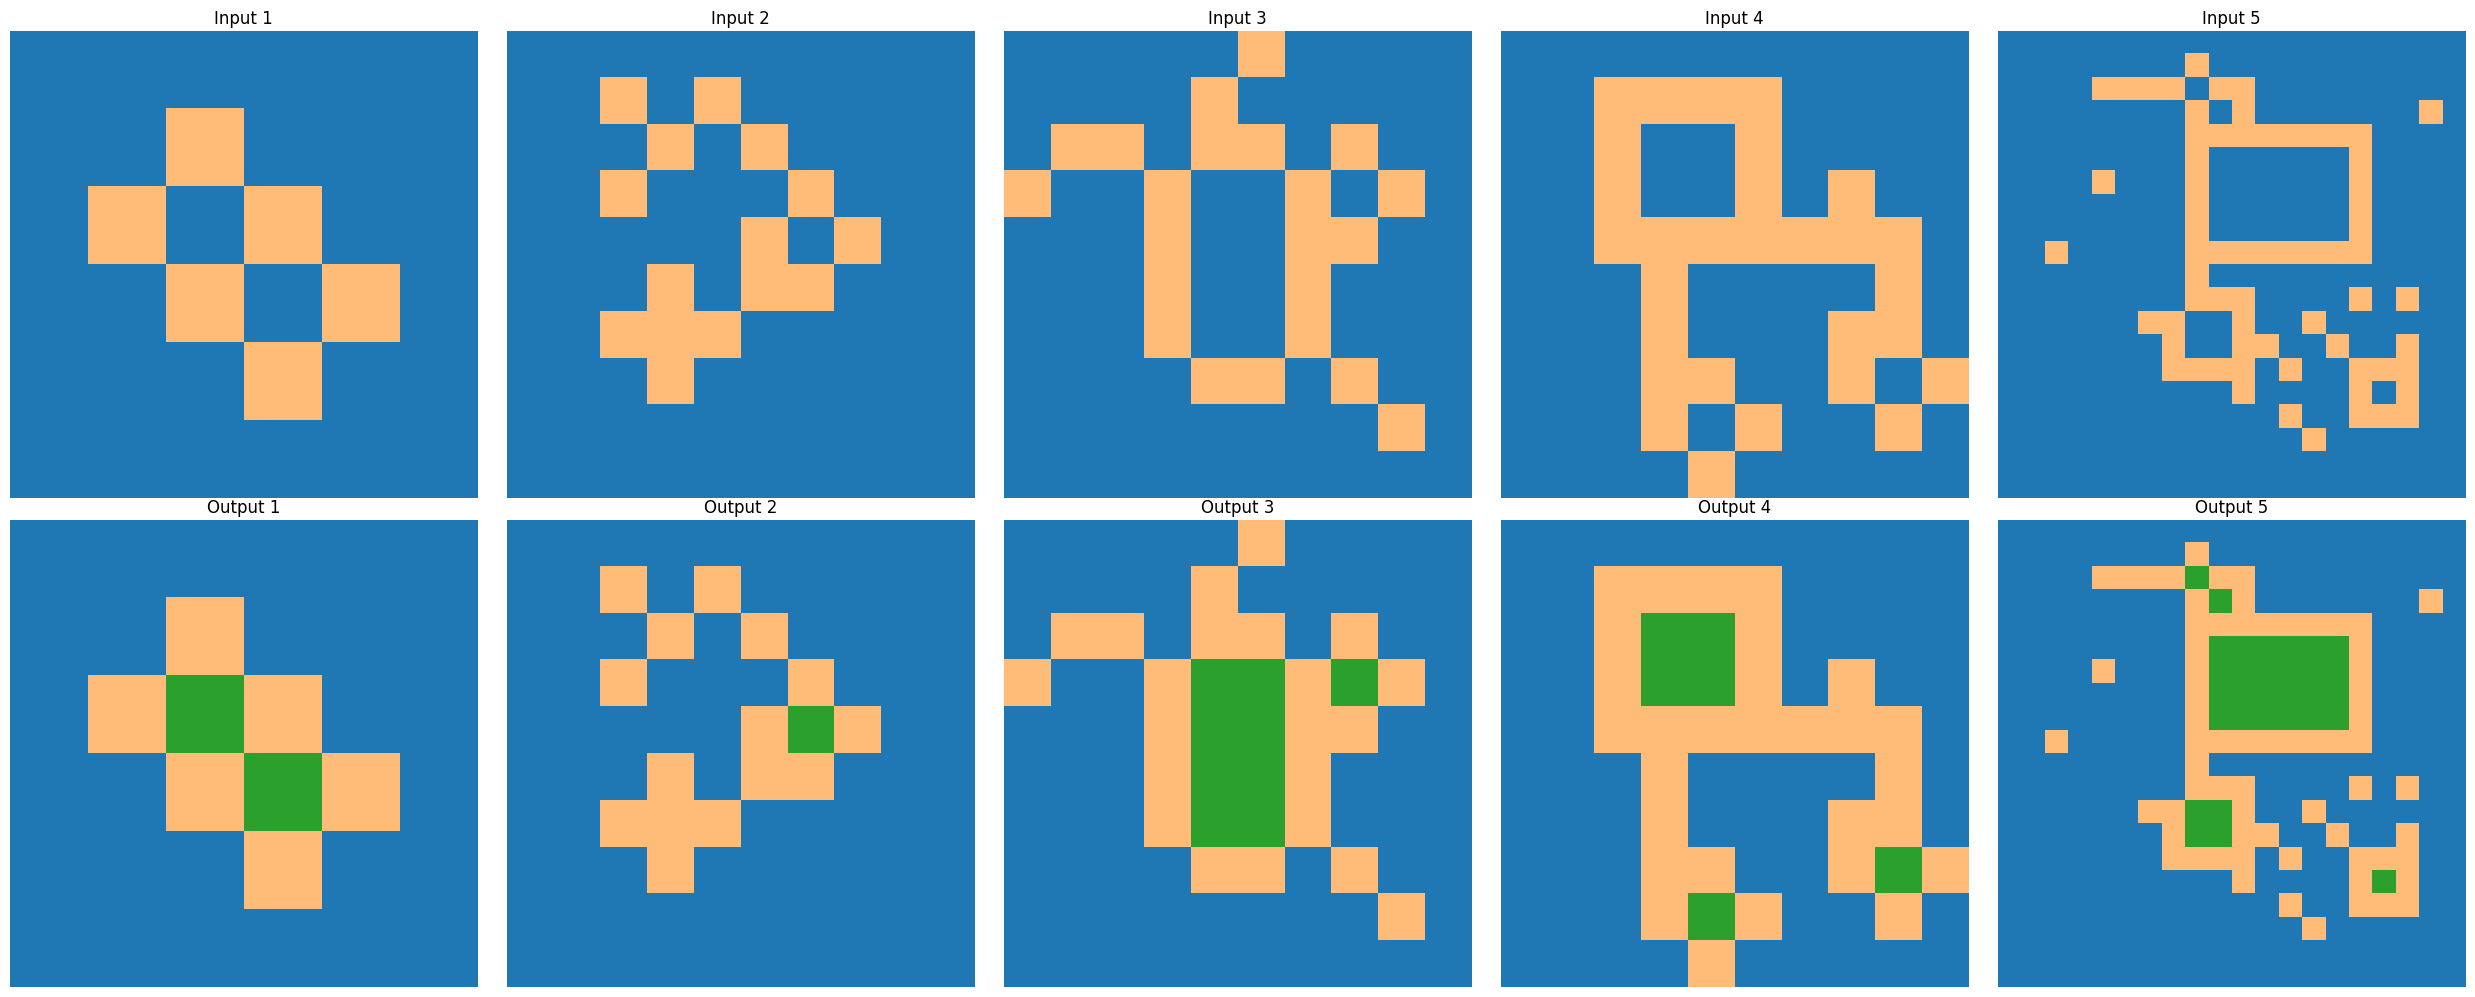

In [103]:
visualize_from_data(c, d)
visualize_from_id('00d62c1b', training_challenges_df)

In [26]:
train_set = []
train_predict_set = []
eval_set = []
eval_predict_set = []
test_set = []

for i in range(len(train_ids)):
    a, b, c, d = filter_data_by_id(train_ids[i], training_challenges_df)
    train_set.append({'id': train_ids[i], 'input': c, 'output': d})
    train_predict_set.append({'id': train_ids[i], 'input': [a], 'output': [b]})
    e, f, g, h = filter_data_by_id(eval_ids[i], evaluation_challenges_df)
    eval_set.append({'id': eval_ids[i], 'input': g, 'output': h})
    eval_predict_set.append({'id': train_ids[i], 'input': [e], 'output': [f]})

for i in range(len(test_ids)):
    i, j, k = filter_data_by_id(test_ids[i], test_challenges_df, solution=False)
    test_set.append({'id': test_ids[i], 'input': k})

train_set_df = pd.DataFrame(train_set)
eval_set_df = pd.DataFrame(eval_set)
test_set_df = pd.DataFrame(test_set)
train_predict_set_df = pd.DataFrame(train_predict_set)
eval_predict_set_df = pd.DataFrame(eval_predict_set)

display(train_predict_set_df.head())
display(train_set_df.head())
    

,id,input,output
0,007bbfb7,"[[[7, 0, 7], [7, 0, 7], [7, 7, 0]]]","[[[7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0,..."
1,00d62c1b,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,017c7c7b,"[[[1, 1, 1], [0, 1, 0], [0, 1, 0], [1, 1, 1], ...","[[[2, 2, 2], [0, 2, 0], [0, 2, 0], [2, 2, 2], ..."
3,025d127b,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 4, 4,...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 4, 4,..."
4,045e512c,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4..."


,id,input,output
0,007bbfb7,"[[[0, 7, 7], [7, 7, 7], [0, 7, 7]], [[4, 0, 4]...","[[[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7,..."
1,00d62c1b,"[[[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, ...","[[[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, ..."
2,017c7c7b,"[[[0, 1, 0], [1, 1, 0], [0, 1, 0], [0, 1, 1], ...","[[[0, 2, 0], [2, 2, 0], [0, 2, 0], [0, 2, 2], ..."
3,025d127b,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6, 6, 6, 0,...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 6, 6, 6,..."
4,045e512c,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [27]:



train_set_df['standardized_input'] = train_set_df['input'].apply(standardize_data)
train_set_df['standardized_output'] = train_set_df['output'].apply(standardize_data)
train_predict_set_df['standardized_input'] = train_predict_set_df['input'].apply(standardize_data)
train_predict_set_df['standardized_output'] = train_predict_set_df['output'].apply(standardize_data)
eval_set_df['standardized_input'] = eval_set_df['input'].apply(standardize_data)
eval_set_df['standardized_output'] = eval_set_df['output'].apply(standardize_data)
eval_predict_set_df['standardized_input'] = eval_predict_set_df['input'].apply(standardize_data)
eval_predict_set_df['standardized_output'] = eval_predict_set_df['output'].apply(standardize_data)
test_set_df['standardized_input'] = test_set_df['input'].apply(standardize_data)

display(train_set_df.head())

,id,input,output,standardized_input,standardized_output
0,007bbfb7,"[[[0, 7, 7], [7, 7, 7], [0, 7, 7]], [[4, 0, 4]...","[[[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7,...","[[[0, 7, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1...","[[[0, 0, 0, 0, 7, 7, 0, 7, 7, -1, -1, -1, -1, ..."
1,00d62c1b,"[[[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, ...","[[[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, ...","[[[0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -...","[[[0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -..."
2,017c7c7b,"[[[0, 1, 0], [1, 1, 0], [0, 1, 0], [0, 1, 1], ...","[[[0, 2, 0], [2, 2, 0], [0, 2, 0], [0, 2, 2], ...","[[[0, 1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1...","[[[0, 2, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1..."
3,025d127b,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6, 6, 6, 0,...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 6, 6, 6,...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, ...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, ..."
4,045e512c,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [34]:
# most ml models have a specific input shape that they expect
# making everythign 30x30
# convert the whole thing to an image




# Model ideas
# 1. CNN
# 2. S4 -> sequence model, 4 ways 
# Transformer
# Ensembling 

# CNN model
# 1. Input shape 30x30
# 2. 2D Convolutional layer
# 3. 2D Max pooling layer
# 4. 2D Convolutional layer
# 5. 2D Max pooling layer
# 6. Flatten layer
# 7. Dense layer
# 8. Output layer


model = CNNModel()

# Loss function
loss_function = torch.nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training
def train_model(model, train_data, loss_function, optimizer, epochs=10):
    for epoch in range(epochs):
        for i in range(len(train_data)):
            for j in range(len(train_data['standardized_input'].iloc[i])):
                input_data = torch.tensor(train_data['standardized_input'].iloc[i][j]).unsqueeze(0).float()
                output_data = torch.tensor(train_data['standardized_output'].iloc[i]).float()
                optimizer.zero_grad()
                output = model(input_data).squeeze()
                loss = loss_function(output[:len(output), :len(output[0])], output_data[j])
                loss.backward()
                optimizer.step()

            if i % 100 == 0:
                print(f"Epoch: {epoch + 1}, Loss: {loss.item()}")





In [22]:
train_model(model, train_set_df, loss_function, optimizer, epochs=10)


Epoch: 1, Loss: -87.35584259033203
Epoch: 1, Loss: -19595.068359375
Epoch: 1, Loss: -299187.34375
Epoch: 1, Loss: -1781634.625
Epoch: 2, Loss: -4147283.75
Epoch: 2, Loss: -6539427.0
Epoch: 2, Loss: -12897770.0
Epoch: 2, Loss: -23520008.0
Epoch: 3, Loss: -29230098.0
Epoch: 3, Loss: -32656204.0
Epoch: 3, Loss: -50418452.0
Epoch: 3, Loss: -78295912.0
Epoch: 4, Loss: -84787200.0
Epoch: 4, Loss: -84935032.0
Epoch: 4, Loss: -118882840.0
Epoch: 4, Loss: -173315872.0
Epoch: 5, Loss: -176791760.0
Epoch: 5, Loss: -167970528.0
Epoch: 5, Loss: -223209024.0
Epoch: 5, Loss: -314826816.0
Epoch: 6, Loss: -310750240.0
Epoch: 6, Loss: -286142400.0
Epoch: 6, Loss: -368182848.0
Epoch: 6, Loss: -509365024.0
Epoch: 7, Loss: -492446528.0
Epoch: 7, Loss: -444245600.0
Epoch: 7, Loss: -558992256.0
Epoch: 7, Loss: -762991616.0
Epoch: 8, Loss: -726978368.0
Epoch: 8, Loss: -646184320.0
Epoch: 8, Loss: -799783040.0
Epoch: 8, Loss: -1081359360.0
Epoch: 9, Loss: -1019579264.0
Epoch: 9, Loss: -896330496.0
Epoch: 9, Lo

In [115]:
print(len(train_predict_set_df['standardized_input'][0][0][0]))

30


In [28]:
model.eval()
evaluate_model(model, train_predict_set_df)

Accuracy: 74.3875


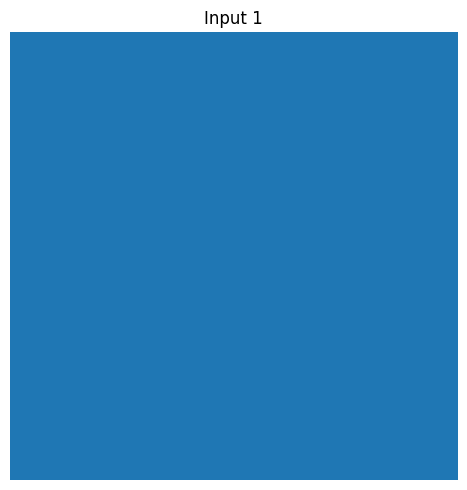

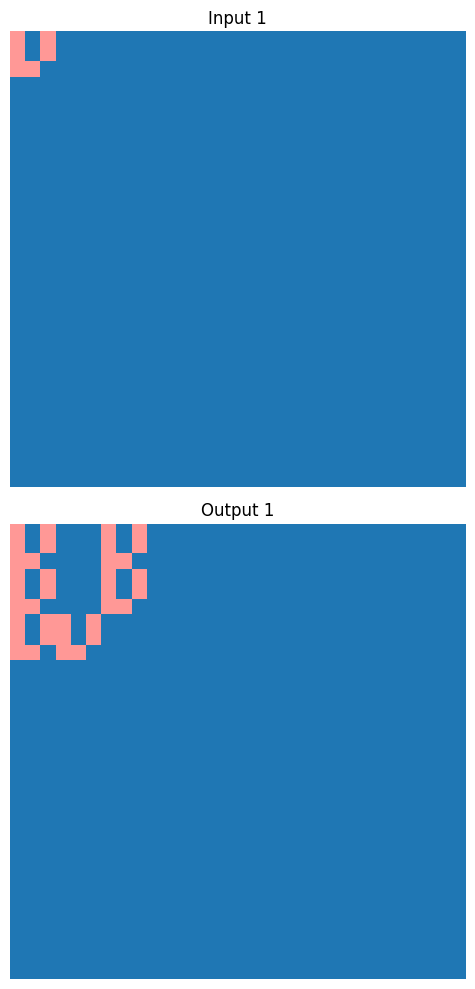

In [104]:
predictions = predict(model, train_predict_set_df)
visualize_from_data(predictions[0])
visualize_from_data([i for i in train_predict_set_df['standardized_input']][0], [i for i in train_predict_set_df['standardized_output']][0])